# Построение модели линейной регрессии

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Снова рассмотрим пример функции $y=cos(1.5\pi sin(x))$. Сгенерируем 30 точек, на которых будем обучать модель линейной регрессии.

In [2]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

n_samples = 30

In [10]:
X = np.sort(np.random.rand(n_samples)) # в возрастающем порядке
y = true_fun(X) + np.random.randn(n_samples) * 0.1

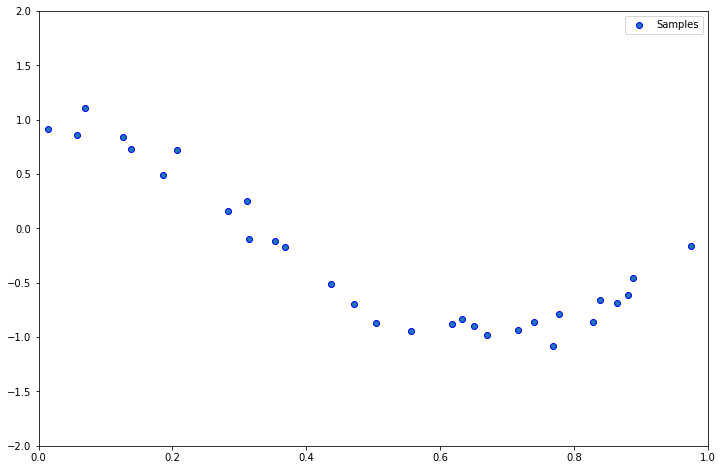

In [16]:
plt.rcParams['figure.figsize'] = (12,8)
plt.scatter(X, y, edgecolor='b', label='Samples')
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.legend()
plt.show()

## 1. Линейная регрессия в sklearn

В библиотеке **Scikit-learn** (sklearn) находится множество реализаций инструментов анализа данных и алгоритмов машинного обучения. Среди алгоритмов можно найти и модель линейной регрессии, которая находится в `sklearn.linear_model`:

In [23]:
from sklearn.linear_model import LinearRegression

Механизм создания и обучения модели схож с тем, как это реализовано в Prophet. Сначала необходимо инициализировать модель в отдельную переменную, затем обучить ее на имеющейся выборке. В `Prophet` экзогенные переменные можно было добавлять в таблицу, содержащую целевую переменную. Что касается `LinearRegression`, то в нее необходимо передать отдельно матрицу объекты-признаки `X` и целевую переменную `y`. Обучим модель линейной регрессии на имеющейся выборке. Поскольку `sklearn` требует, что первый аргумент в `fit` был матрицей, переведем имеющийся вектор `X` в матрицу с помощью функции `reshape`:

In [24]:
X = X.reshape(-1, 1) #перевод в матричный столбец

In [25]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Визуализируем полученную модель. Для этого создадим 100 точек на том же интервале и оценим целевую переменную для них с помощью функции `predict`:

In [26]:
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

In [27]:
predictions = model.predict(X_test)

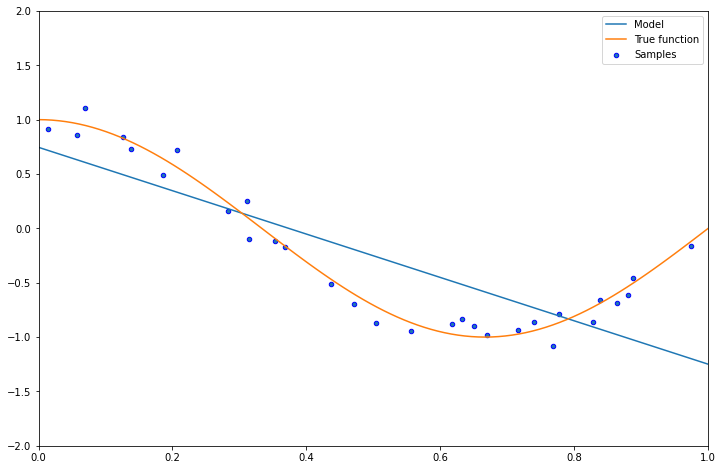

In [28]:
plt.plot(X_test, predictions, label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.legend()
plt.show()

Очевидно, сложность модели недостаточная, наблюдается неодообучение. Построим полиномиальную регрессию.

## 2. Полиномиальная регрессия

Библиотека `sklearn` содержит множество методов подготовки данных для анализа и построения моделей. Чтобы построить полиномиальную регрессию, необходимо создать матрицу объекты-признаки вида $1, x, x^2,...$

Чтобы получить такую матрицу, можно воспользоваться функцией `PolynomialFeatures` из модуля `preprocessing`.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

Преобразование данных (в нашем случае преобразование $x$ в  $1, x, x^2,...$) осуществляется аналогичным построению моделей образом с помощью функции `fit`. Получим матрицу для построения полиномиальной регрессии третьего порядка:

In [30]:
polynomial_features = PolynomialFeatures(degree=3)
polynomial_features.fit(X)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

По умолчанию, если исходная матрица содержит несколько признаков, то кроме степеней будут созданы также колонки с всевозможными комбинациями этих признаков, например, при имеющихся признаках `[a, b]` и степенью `degree=2` результатом работы функции будет матрица `[1, a, b, a^2, ab, b^2]`.

Чтобы получить результат преобразования, необходимо последовательно применить функции `fit` и `transform` или же сразу `fit_transform`:

In [34]:
X_poly = polynomial_features.transform(X) # создаст матрицу 1,x,x^2, x^3

In [35]:
np.all(X_poly == polynomial_features.fit_transform(X))

True

In [36]:
X_poly[:10]

array([[1.00000000e+00, 1.45946413e-02, 2.13003554e-04, 3.10871046e-06],
       [1.00000000e+00, 5.80989816e-02, 3.37549166e-03, 1.96112628e-04],
       [1.00000000e+00, 6.89144809e-02, 4.74920568e-03, 3.27289044e-04],
       [1.00000000e+00, 1.25895920e-01, 1.58497827e-02, 1.99542298e-03],
       [1.00000000e+00, 1.38166104e-01, 1.90898723e-02, 2.63757329e-03],
       [1.00000000e+00, 1.86416049e-01, 3.47509434e-02, 6.47813357e-03],
       [1.00000000e+00, 2.06700047e-01, 4.27249095e-02, 8.83124082e-03],
       [1.00000000e+00, 2.83573735e-01, 8.04140632e-02, 2.28033162e-02],
       [1.00000000e+00, 3.11051067e-01, 9.67527665e-02, 3.00950513e-02],
       [1.00000000e+00, 3.13668405e-01, 9.83878681e-02, 3.08611656e-02]])

Построим теперь модель на полученной матрице:

In [37]:
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

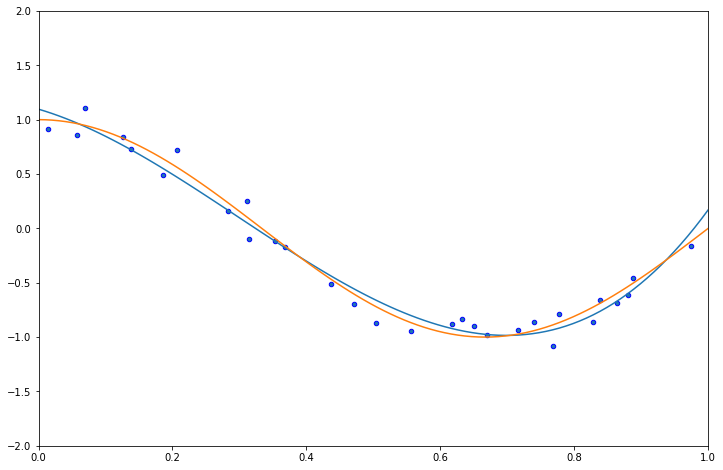

In [38]:
X_test_poly = polynomial_features.transform(X_test)
plt.plot(X_test, model.predict(X_test_poly), label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

## 3. Оценка качества модели

### 3.1. Метрики качества

В sklearn реализовано большое количество метрик качества, в т.ч. MSE, MAE, R2. Все они находятся в модуле `sklearn.metrics`:

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

На вход каждая из этих функций принимает две переменные: истинные значения `y_true` и предсказанные `y_pred`:

In [40]:
mean_squared_error(true_fun(X_test), model.predict(X_test_poly))

0.0035431005031992696

In [41]:
mean_absolute_error(true_fun(X_test), model.predict(X_test_poly))

0.05178299111463382

In [42]:
explained_variance_score(true_fun(X_test), model.predict(X_test_poly))

0.992396823773566

### 3.2. Отложенная выборка

Для создания отложенной выборки в sklearn предусмотрен модуль `model_selection` и функция `train_test_split` из него. По умолчанию `train_test_split` разбивает выборку последовательно, то есть более поздние наблюдения окажутся в тестовой выборке. Опция `test_size` позволяет задать долю наблюдений, которая окажется в тестовой выборке:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [45]:
X_train.shape, X_test.shape

((20, 1), (10, 1))

Если же нет привязки ко времени, то можно сначала перемешать выборку, указав `shuffle=True` и задав `random_state`, чтобы зафиксировать разбиение.

In [24]:
#пример
# train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

### 3.3. Кросс-валидация

Для оценки качества на кросс-валидации воспользуемся функцией `cross_val_score` из того же модуля `model_selection`. На вход данной функции требуется передать модель, обучающую выборку, также можно указать метрику качества и число блоков разбиения:

In [46]:
from sklearn.model_selection import cross_val_score, KFold

In [47]:
cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

array([-0.52911484, -0.04495417, -0.35119619, -0.12820051, -1.06903886])

Принято в `cv` передавать не количество блоков, а генератор разбиения `KFold`, в котором задается число блоков, а также фиксируется само разбиение:

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

array([-0.11590633, -0.12468244, -0.1466662 , -0.35759445, -0.14902745])

В результате получили 5 оценок на каждом из блоков.

In [50]:
_.mean(), _.std()

(-0.17877537293055543, 0.09030034594197998)

Обратите внимание, что `cross_val_score` выдает значение метрики качества со знаком минус. В `scoring` название метрики качества передавалось с приставкой `neg`. Это связано с особенностями реализации методов в sklearn. Считается, что чем больше значение метрики качества, тем лучше.

### 3.4. Кросс-валидация на временных рядах

Как выяснилось ранее, кросс-валидация на временных рядах имеет свои особенности. Для ее проведения также используется функция `cross_val_score`, однако в `cv` передается генератор разбиения `sklearn.model_selection.TimeSeriesSplit`.

In [51]:
from sklearn.model_selection import TimeSeriesSplit

In [52]:
tss = TimeSeriesSplit(n_splits=5)

In [32]:
#пример
# cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=tss)

## 4. Pipeline

Функция `Pipeline` позволяет последовательно выполнять преобразования над данными. Нет необходимости сначала создавать полиномиальные признаки, затем строить модель, достаточно передавать в готовый `Pipeline` исходные данные.

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('linear_regression', model)])

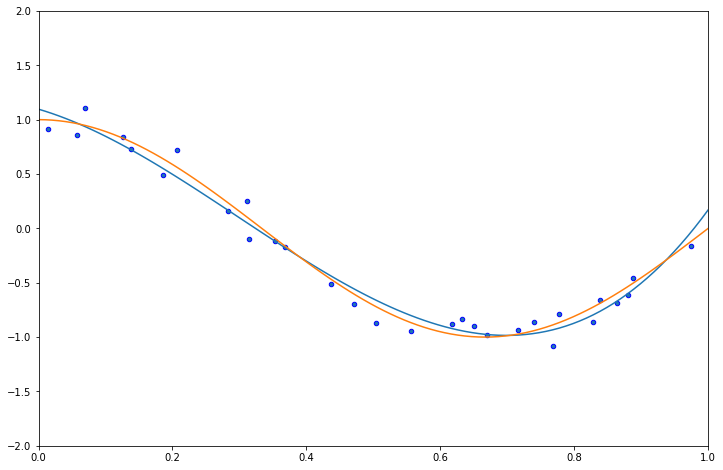

In [55]:
pipeline.fit(X, y)
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(X_test, pipeline.predict(X_test), label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

## 5. Гребневая регрессия, лассо регрессия

Рассмотрим полиномы различных степеней для решения представленной задачи. Для сравнения оценим качество моделей на кросс-валидации по 10 блокам с помощью метрики MSE.

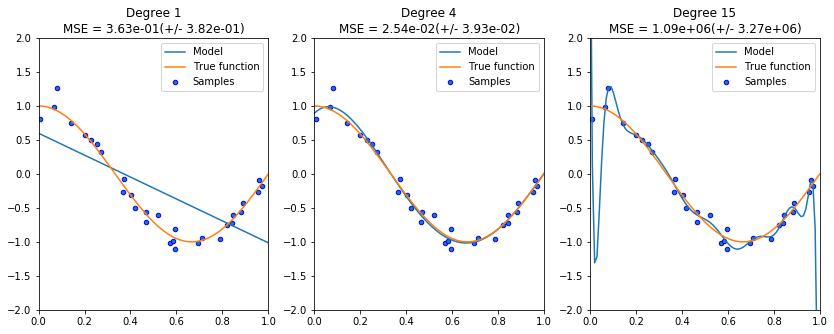

In [36]:
plt.rcParams['figure.figsize'] = (14,5)
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show()

Для противодействия переобучению прибегают к гребневой или лассо регрессиям. Они также находятся в модуле `sklearn.linear_model`:

In [37]:
from sklearn.linear_model import Ridge, Lasso

### 5.1. Гребневая регрессия

При инициализации модели есть возможность указать значение параметра регуляризации. В `sklearn` это `alpha`. По умолчаю в `Ridge` значение параметра регуряризации равно 1.

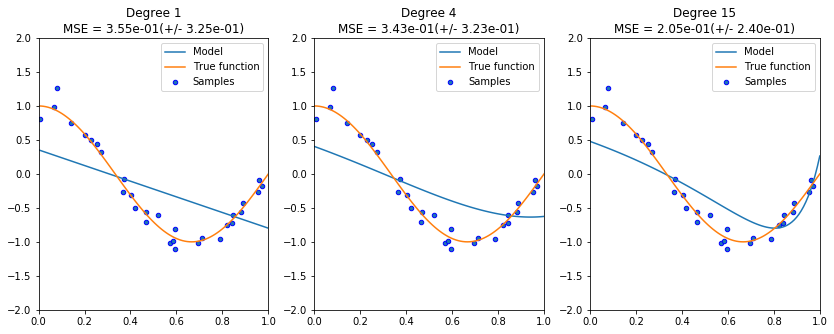

In [38]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Ridge(alpha=1)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

Как видно из примера, при значении $\lambda=1$ регуляризация слишком сильная и необходимо выбрать другое значение для улучшения качества аппроксимации.

### 5.3. Лассо регрессия

Рассмотрим модель лассо регрессии. Также убедимся, что регуляризация оказалась слишком сильной для данной задачи, и решение свелось к константе.

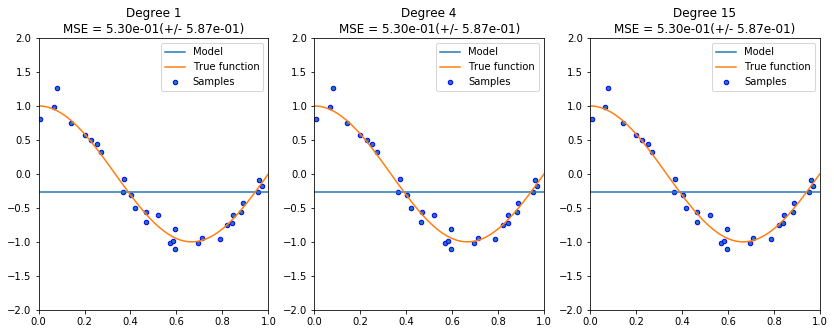

In [39]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Lasso(alpha=1)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

Выберем `alpha=0.01`:

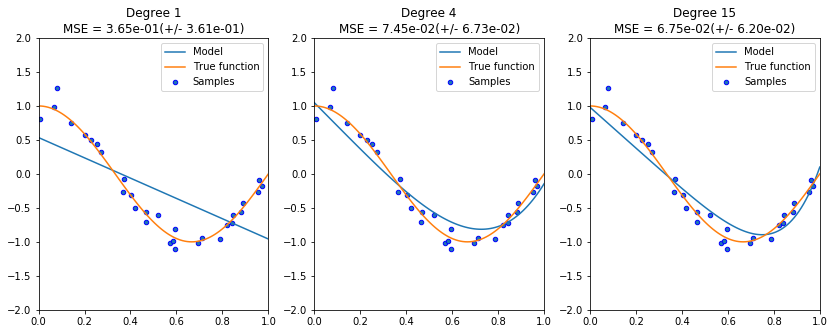

In [40]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Lasso(alpha=0.01)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

Видно, что регуляризация помогла избежать переобучения, однако лассо регрессия здесь не лучший вариант. Посмотрим на соответствующие коэффициенты модели:

In [41]:
model.coef_

array([ 0.        , -3.00521381, -0.        ,  0.        ,  0.        ,
        0.        ,  2.12505316,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

Большая часть коэффициентов оказались равными нулю. Таким образом, лассо регрессия позволяет отбирать наиболее значимые признаки.

## 6. Выбор параметра регуляризации $\lambda$

Как было отмечено ранее, параметр регуляризации может быть выбран на кросс-валидации. Такой прием реализован в функции `sklearn.model_selection.GridSearchCV`. На вход ей необходимо передать словарь параметров, которые нужно перебрать: их названия и значения. Выбор параметров также реализован через функцию `fit`.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
alpha_list = {'alpha': [0, 0.01, 0.1, 0.5, 1]}

In [44]:
X_poly = polynomial_features.transform(X)

In [45]:
model = Ridge()

In [46]:
gs = GridSearchCV(model, alpha_list, scoring='neg_mean_squared_error', cv=kf)

In [47]:
gs.fit(X_poly, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

Лучшую модель, оптимальные по заданной метрике значения параметров и само значение метрики качества можно получить после обучения `GridSearchCV`:

In [48]:
gs.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
gs.best_params_

{'alpha': 0.01}

In [50]:
gs.best_score_

-0.028207853502032615

Посмотрим на результаты с новым значением параметра регуляризации:

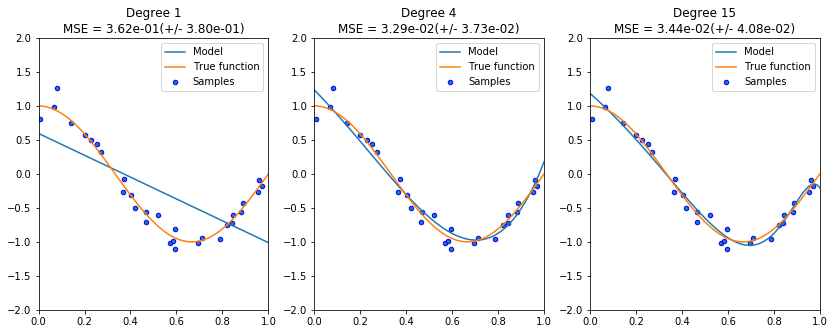

In [51]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Ridge(alpha=0.01)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

Несмотря на то, что была выбрана довольно высокая степень полинома, это не привело к переобучению.

Если подбор параметров осуществляется внутри `Pipeline`, то нужно указать полный "путь" параметра через двойное нижнее подчеркивание:

In [52]:
pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('ridge', model)])

In [53]:
params = {'polynomial_features__degree': [2, 3, 4, 8, 15], 
          'ridge__alpha': [0, 0.01, 0.1, 0.5, 1]}

In [54]:
gs = GridSearchCV(pipeline, params, scoring='neg_mean_squared_error', cv=kf)

In [55]:
gs.fit(X, y)
gs.best_estimator_

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [56]:
gs.best_params_

{'polynomial_features__degree': 4, 'ridge__alpha': 0}

<div class="alert alert-info">

<h4> Домашнее задание. Выполнять в отдельном файле, в названии указать фамилию и название работы</h4>
<p></p>

С помощью LinearRegression построить две модели SARIMA для своего временного ряда: 
<li>полученную при выполнении задания "5. Построение модели SARIMAX" и </li>
<li>полученную с помощью функции TimeSeriesModelFit в Mathematica.</li>
    
Для этого создать матрицу объекты-признаки, которая будет состоять из "сдвинутых" на нужное количество лагов значений. Оценить качество обеих моделей методом кросс-валидации на временных рядах (TimeSeriesSplit + cross_val_score) с метрикой MSE или MAE.
    
**Задание для всех**: для простоты построить только модели авторегрессии с обычными и сезонными лагами.
    
**Указание**: если модели из statsmodels и Mathematica совпадают, взять вторую модель чуть большего порядка, чем первая.

<p></p>
</div>

<div class="alert alert-warning">

<h4>Задание для продвинутых</h4>
<p></p>

Построение модели SARIMA происходит в два этапа, поэтому для того, чтобы включить модель скользящего среднего и оценивать качество на кросс-валидации необходимо написать класс, который наследует BaseEstimator из sklearn и имеет два метода: fit и predict. Каркас модели представлен ниже. Довести начатое до конца и построить модели SARIMA, включающие как модель авторегресии, так и модель скользящего среднего.

<p></p>
</div>

In [57]:
from sklearn.base import BaseEstimator

class SARIMA(BaseEstimator):
    def __init__(self, 
                 order=(1,1,1), 
                 seasonal_order=(1,1,1,12)):
        
        # Ваш код здесь
        pass 
        
    def fit(self, X, y):
        
        # Ваш код здесь
        pass 
    
    def predict(self, X):
        
        # Ваш код здесь
        pass